# Lesson 10: Fazendo mapas com cartopy

Hoje vamos aprender sobre o `cartopy`, um pacote em Python projetado para processamento e plotagem de dados geoespaciais. O Cartopy é amplamente utilizado para criar mapas nas Ciências da Terra. Também é usado por grandes veículos de mídia para produzir belos mapas interativos sobre eleições (estados vermelhos, azuis e roxos), estatísticas da COVID-19 (por exemplo, taxas de vacinação entre países e estados) e previsões do tempo.

Ao final deste tutorial, você será capaz de usar o `cartopy` para:

1. Plotar mapas globais com diferentes projeções.
2. Plotar mapas com dados georreferenciados.
3. Plotar mapas com imagens de mosaico (por exemplo, mapas de ruas do Google).

### Módulos básicos

In [62]:
# the basics
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cmocean as cmo

# cartopy 
import cartopy.crs as ccrs       # ccrs contém informações sobre projeções
import cartopy                   # contém todos as outras funções/classes/métodos do cartopy

### Básico do cartopy

In [63]:
# ccrs contains the cartopy projection methods (defined by python 'classes')
ccrs.PlateCarree()

<Derived Projected CRS: +proj=eqc +ellps=WGS84 +a=6378137.0 +lon_0=0.0 +to ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (unknown)
- N[north]: Northing (unknown)
- h[up]: Ellipsoidal height (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Equidistant Cylindrical
Datum: unknown
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

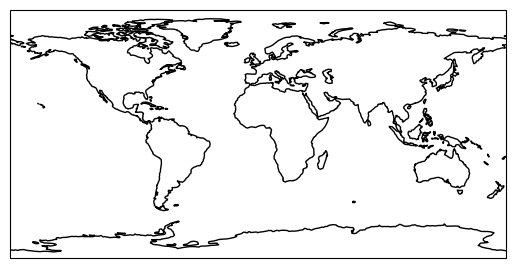

In [64]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

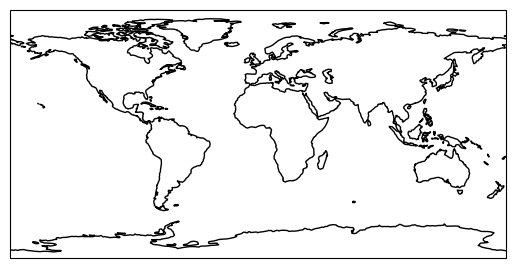

In [65]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()

In [66]:
ccrs.PlateCarree?

Init signature: ccrs.PlateCarree(central_longitude=0.0, globe=None)
Docstring:     
The abstract class which denotes cylindrical projections where we
want to allow x values to wrap around.
Init docstring:
Parameters
----------
proj4_params: iterable of key-value pairs
    The proj4 parameters required to define the
    desired CRS.  The parameters should not describe
    the desired elliptic model, instead create an
    appropriate Globe instance. The ``proj4_params``
    parameters will override any parameters that the
    Globe defines.
globe: :class:`~cartopy.crs.Globe` instance, optional
    If omitted, the default Globe instance will be created.
    See :class:`~cartopy.crs.Globe` for details.
File:           ~/Software/mambaforge/lib/python3.10/site-packages/cartopy/crs.py
Type:           ABCMeta
Subclasses:     


/Users/crocha/Software/mambaforge/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/crocha/Software/mambaforge/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


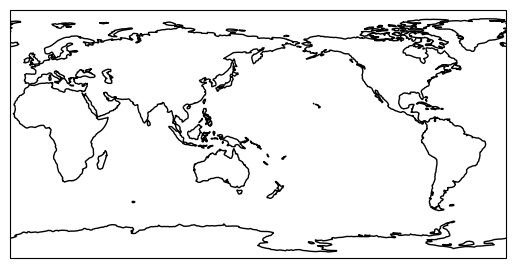

In [67]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=160))
ax.coastlines()

In [68]:
# uma projeção diferente: segmento de globo
ccrs.Orthographic(
    central_longitude=-30,
    central_latitude=-60
)

/Users/crocha/Software/mambaforge/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/crocha/Software/mambaforge/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/crocha/Software/mambaforge/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/crocha/Software/mambaforge/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


<Derived Projected CRS: +proj=ortho +a=6378137.0 +lon_0=-30 +lat_0=-60 +no ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Orthographic
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Greenwich

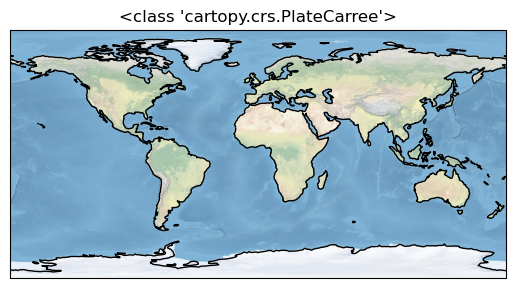

/Users/crocha/Software/mambaforge/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


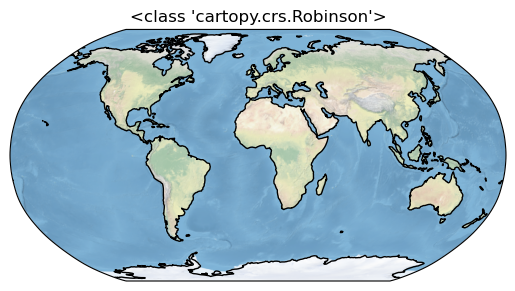

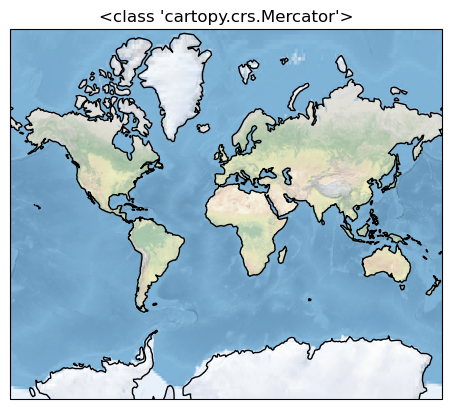

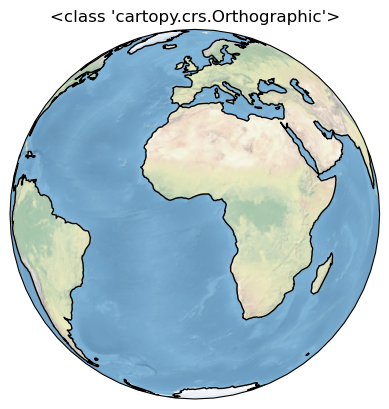

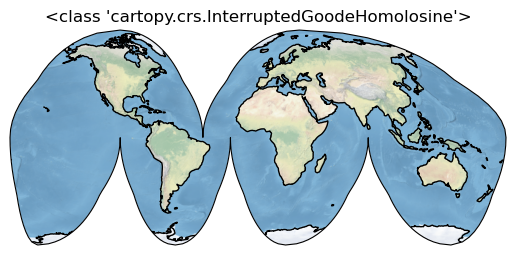

In [69]:
# visualizando algumas outras projeções

# 1. cria uma lista de projeções
projections = [ccrs.PlateCarree(),
               ccrs.Robinson(),
               ccrs.Mercator(),
               ccrs.Orthographic(),
               ccrs.InterruptedGoodeHomolosine()
              ]

# 2. faz um laço na lista de projeções e 
#    plota uma mapa simples para cada projeção
for proj in projections:
    plt.figure()
    ax = plt.axes(projection=proj)
    ax.stock_img()
    ax.coastlines()
    ax.set_title(f'{type(proj)}')

### Plotando um mapa regional e adicionando feições (continente, linha de costa, estados, oceano, lagos, rios)

In [70]:
import cartopy.feature as cfeature

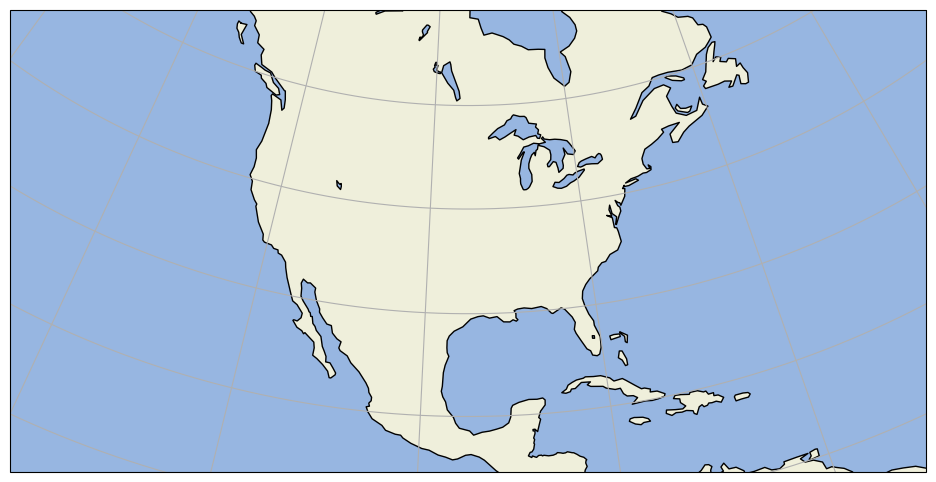

In [71]:
central_lat = 37.5
central_lon = -96
extent = [-140, -50, 10, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
# ax = plt.axes(projection=ccrs.Mercator(central_lon, central_lat))

ax.set_extent(extent)

# Add basic features
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
# ax.add_feature(cartopy.feature.RIVERS)

ax.gridlines()

### Plotando dados em mapas cartopy

In [72]:
# Get slice of ETOPO1 topography data from WHOI's GEOPORT thredds server
regional_extent = [-128, -118, 32, 50]

regional_area = {
    'lon': [-128,-118,-118,-128,-128],
    'lat': [32, 32,50,50,32],
}

url = 'http://geoport.whoi.edu/thredds/dodsC/bathy/etopo1_bed_g2'
bathy = xr.open_dataset(url)
bathy = bathy.sel(lon=slice(regional_extent[0]-2,regional_extent[1]+2),
                  lat=slice(regional_extent[2]-2,regional_extent[3]+2)
)

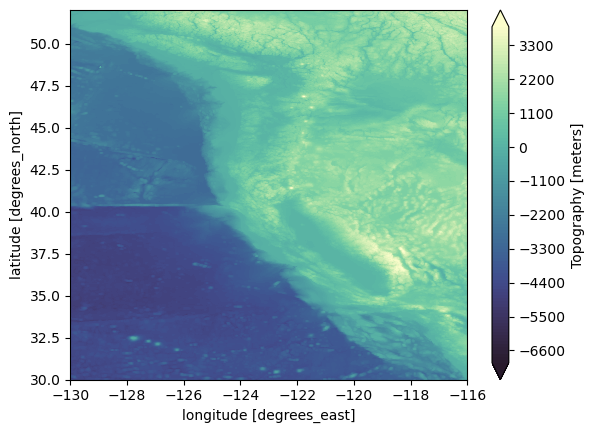

In [73]:
kw_t = {
    'levels': np.arange(-7000,4000,100),
    'cmap': cmo.cm.deep_r,
    'extend': 'both'
}

# plot sem projeção
bathy.topo.plot.contourf(**kw_t)

In [74]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [75]:
# get some data
DATA_PATH = './'
filename = 'saildrone_west_coast_survey_2019_9fb9_8ec5_2ab9.nc'
ds = xr.open_dataset(DATA_PATH + filename)

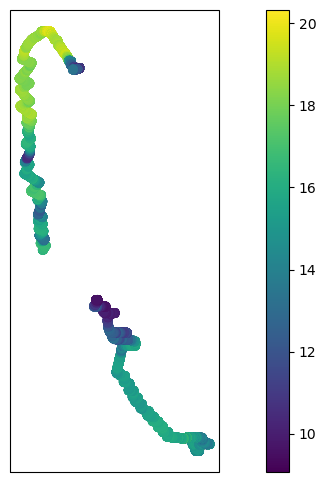

In [55]:
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
im = ax.scatter(ds.longitude,ds.latitude,
           c=ds.TEMP_SBE37_MEAN,transform=ccrs.PlateCarree(),zorder=10)

plt.colorbar(im)

/Users/crocha/Software/mambaforge/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/Users/crocha/Software/mambaforge/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/crocha/Software/mambaforge/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_rivers_lake_centerlines.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/crocha/Software/mambaforge/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lines.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/crocha

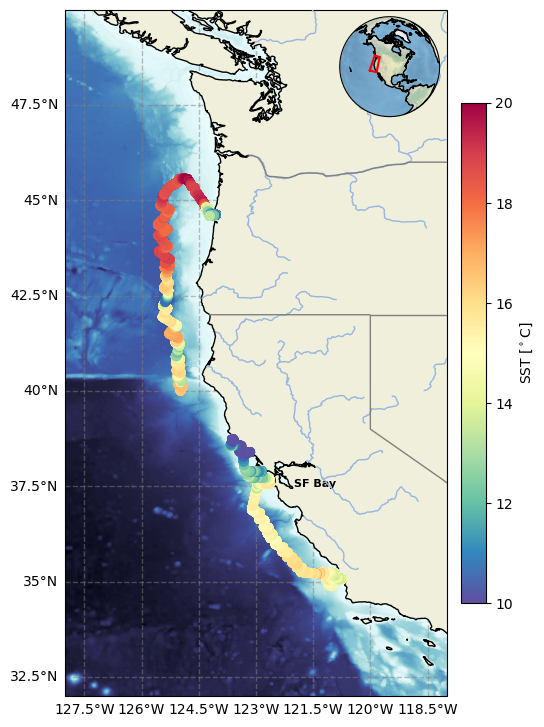

In [56]:
fig = plt.figure(figsize=(6, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(regional_extent)

kw_topo = {
    'levels': np.arange(-5000,50,50),
    'cmap': cmo.cm.ice,
    'extend': 'both'
}

kw_temp = {
    'vmin': 10,
    'vmax': 20,
    'cmap': 'Spectral_r'
}

bathy.topo.plot.contourf(**kw_topo,transform=ccrs.PlateCarree(),add_colorbar=False,zorder=0)

ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=2)
ax.add_feature(cartopy.feature.RIVERS,zorder=3)

# Add more complex features
# first, create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

# then, add the feature
ax.add_feature(states_provinces, edgecolor='gray',zorder=4)

# adding gridlines and labels
gl = ax.gridlines(
    crs=ccrs.PlateCarree(), 
    draw_labels=True,
    linewidth=1, 
    color='gray', 
    alpha=0.5, 
    linestyle='--'
)

# remove top and right (redundant) labels
gl.top_labels = False
gl.right_labels = False

# annotate on the figure
ax.text(-122, 37.5, 
        'SF Bay',
        fontsize=8,
        fontweight='bold',)

# plot some data
im = ax.scatter(ds.longitude,ds.latitude,
           c=ds.TEMP_SBE37_MEAN,**kw_temp,transform=ccrs.PlateCarree(),zorder=10)


plt.colorbar(im,label=r'SST [$^\circ$C]',shrink=0.65,pad=0.03)

# create inset axis
proj2 = ccrs.Orthographic(
    central_longitude=-100,
    central_latitude=40
)

ax2 = inset_axes(
    ax,
    width=1, height=1,
    axes_class=cartopy.mpl.geoaxes.GeoAxes, 
    axes_kwargs=dict(map_projection=proj2)
)

ax2.stock_img()
ax2.coastlines()

ax2.plot(regional_area['lon'],
        regional_area['lat'],
        transform=ccrs.PlateCarree(),
        color='r')

# save figure
fig.savefig('map_WestCoast.png',
            bbox_inches='tight',
            dpi=125
)

/Users/crocha/Software/mambaforge/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/crocha/Software/mambaforge/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/crocha/Software/mambaforge/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/crocha/Software/mambaforge/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


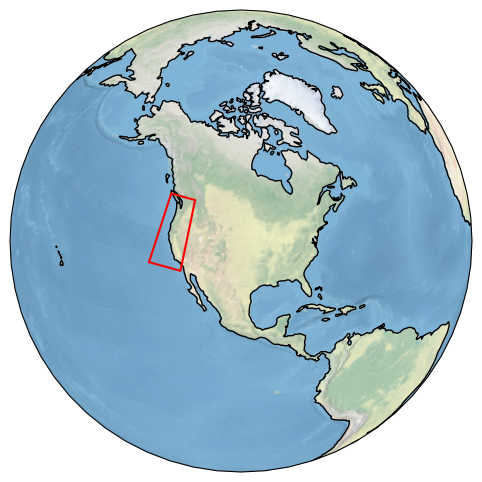

In [57]:
# plotting a small globe for context
# then add it to the full figure
plt.figure(figsize=(12, 6))
proj2 = ccrs.Orthographic(
    central_longitude=-100,
    central_latitude=41
)
ax = plt.axes(projection=proj2)

ax.stock_img()
ax.coastlines()

regional_area = {
    'lon': [-128,-118,-118,-128,-128],
    'lat': [32, 32,50,50,32],
}

ax.plot(regional_area['lon'],
        regional_area['lat'],
        transform=ccrs.PlateCarree(),
        color='r')


### Plotanto imagens em "tiles"

In [19]:
import cartopy.io.img_tiles as cimgt

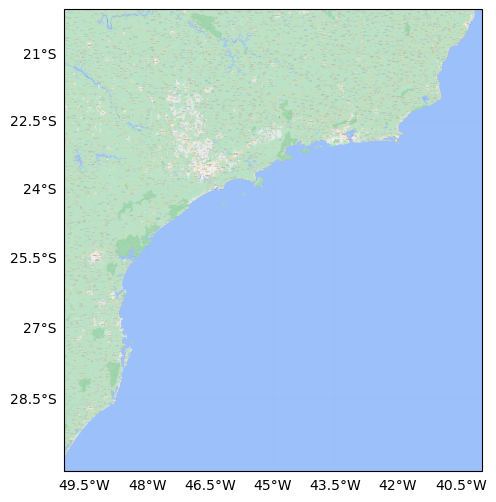

In [61]:
extent = [-46.5, -46.1, -24.15, -23.8]

# create a request for google maps figure tiles
request = cimgt.GoogleTiles()

fig, ax = plt.subplots(figsize=(10, 6),
                       subplot_kw=dict(projection=request.crs))

ax.set_extent(extent)

# plot figure tiles
ax.add_image(request, 10)


# adding gridlines and labels
gl = ax.gridlines(
    crs=ccrs.PlateCarree(), 
    draw_labels=True,
    linewidth=0.01, 
    color='gray', 
    alpha=0.5, 
    linestyle='--'
)

# remove top and right (redundant) labels
gl.top_labels = False
gl.right_labels = False

# Plotting data points
# data_points = {
#     'lon': [-46.338],
#     'lat': [-24],
# }

# ax.plot(data_points['lon'],data_points['lat'],
#         'r*',transform=ccrs.PlateCarree(),zorder=2)

# figure with maps
fig.savefig('BaiadeSantos.png',bbox_inches='tight',dpi=170)

### Resources

1. [Cartopy official documentation](https://scitools.org.uk/cartopy/docs/v0.16/index.html)

2. [Cartopy example gallery](https://scitools.org.uk/cartopy/docs/v0.16/gallery/index.html)

